# [Model-001] SimpleConvNet for baseline

작성일:[2019-10-13]<br>
작성자:Paul Kim

## 목표
간단한 Convolutional Network에 Raw 데이터 그대로 넣어 Baseline을 측정.

### 1. Library Load

In [1]:
import numpy as np
import pandas as pd

import models

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import tensorflow as tf 
import tensorflow.keras.layers as L

from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import Adam
from tensorflow.python.ops.losses.losses_impl import log_loss

from sklearn.model_selection import train_test_split

# Tensorflow Settings 
tf.executing_eagerly()
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus: tf.config.experimental.set_memory_growth(gpus[0], True)

### 2. Data load

In [2]:
"Data Load"
path_train = "C:/Users/win10/Workspace/kaggle.dataset/statoil-iceberg-classifier-challenge/train.json"
train = pd.read_json(path_train)
train['inc_angle'] = pd.to_numeric(train['inc_angle'],errors='coerce')

### 3. Data 준비

In [3]:
"Data preparing" 
batch_size = 256

band_1 = train['band_1'].apply(lambda x: np.reshape(x, newshape=(75,75)))
band_2 = train['band_2'].apply(lambda x: np.reshape(x, newshape=(75,75)))

X = np.array([
    np.transpose(np.array([b1,b2]),[1,2,0]) 
    for b1, b2 in zip(band_1, band_2)], dtype=np.float32)

Y = np.array(train['is_iceberg'], dtype=np.float32)

"Data Normalizing"
"(-49.0835, 37.090523)"
nmax, nmin = 40 , -50
X_norm = (X - nmin)/ (nmax- nmin)

"Data spliting"
X_train, X_valid, y_train, y_valid = train_test_split(X_norm, Y, test_size=0.25)

"Build Dataset"
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).shuffle(10000)
val_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(401).shuffle(10000)

### 4. Model build & compile

In [20]:
model = models.simpleConvNet()
model.build(input_shape=(batch_size,75,75,2))
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=[log_loss],
)
model.summary()

Model: "simple_conv_net_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_18 (Sequential)   multiple                  1216      
_________________________________________________________________
sequential_19 (Sequential)   multiple                  73856     
_________________________________________________________________
sequential_20 (Sequential)   multiple                  147584    
_________________________________________________________________
sequential_21 (Sequential)   multiple                  73792     
_________________________________________________________________
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
sequential_22 (Sequential)   multiple                  131584    
_________________________________________________________________
sequential_23 (Sequential)   multiple            

In [9]:
"Model Training"
check_pointer = ModelCheckpoint(
    filepath='./models/simple_conv_net.h5',
    monitor='val_log_loss',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',)

history = model.fit(
    dataset, 
    validation_data=val_dataset, 
    epochs=250,
    callbacks=[check_pointer])

Epoch 1/250
5/5 [==============================] - 1s 254ms/step - loss: 0.6923 - log_loss: 0.6923 - val_loss: 0.0000e+00 - val_log_loss: 0.0000e+00
Epoch 2/250
5/5 [==============================] - 1s 100ms/step - loss: 0.6899 - log_loss: 0.6880 - val_loss: 0.6923 - val_log_loss: 0.6923
Epoch 3/250
5/5 [==============================] - ETA: 0s - loss: 0.6866 - log_loss: 0.68 - 1s 106ms/step - loss: 0.6869 - log_loss: 0.6874 - val_loss: 0.6921 - val_log_loss: 0.6921
Epoch 4/250
5/5 [==============================] - 0s 100ms/step - loss: 0.6882 - log_loss: 0.6888 - val_loss: 0.6915 - val_log_loss: 0.6915
Epoch 5/250
5/5 [==============================] - 1s 102ms/step - loss: 0.6870 - log_loss: 0.6855 - val_loss: 0.6894 - val_log_loss: 0.6894
Epoch 6/250
5/5 [==============================] - 1s 101ms/step - loss: 0.6837 - log_loss: 0.6840 - val_loss: 0.6879 - val_log_loss: 0.6879
Epoch 7/250
5/5 [==============================] - 1s 101ms/step - loss: 0.6853 - log_loss: 0.6839 - val

5/5 [==============================] - 0s 97ms/step - loss: 0.2009 - log_loss: 0.2042 - val_loss: 0.2656 - val_log_loss: 0.2656
Epoch 59/250
5/5 [==============================] - 0s 99ms/step - loss: 0.2035 - log_loss: 0.2009 - val_loss: 0.2729 - val_log_loss: 0.2729
Epoch 60/250
5/5 [==============================] - 0s 100ms/step - loss: 0.2115 - log_loss: 0.2157 - val_loss: 0.2899 - val_log_loss: 0.2899
Epoch 61/250
5/5 [==============================] - 1s 100ms/step - loss: 0.2198 - log_loss: 0.2066 - val_loss: 0.3025 - val_log_loss: 0.3025
Epoch 62/250
5/5 [==============================] - 0s 100ms/step - loss: 0.1961 - log_loss: 0.2047 - val_loss: 0.2791 - val_log_loss: 0.2791
Epoch 63/250
5/5 [==============================] - 0s 100ms/step - loss: 0.2013 - log_loss: 0.2007 - val_loss: 0.2572 - val_log_loss: 0.2572
Epoch 64/250
5/5 [==============================] - 1s 100ms/step - loss: 0.2016 - log_loss: 0.1931 - val_loss: 0.2397 - val_log_loss: 0.2397
Epoch 65/250
5/5 [===

5/5 [==============================] - 0s 97ms/step - loss: 0.1415 - log_loss: 0.1393 - val_loss: 0.3230 - val_log_loss: 0.3230
Epoch 116/250
5/5 [==============================] - 1s 100ms/step - loss: 0.1205 - log_loss: 0.1263 - val_loss: 0.4121 - val_log_loss: 0.4121
Epoch 117/250
5/5 [==============================] - 0s 98ms/step - loss: 0.1314 - log_loss: 0.1485 - val_loss: 0.2620 - val_log_loss: 0.2620
Epoch 118/250
5/5 [==============================] - 0s 96ms/step - loss: 0.1284 - log_loss: 0.1228 - val_loss: 0.2391 - val_log_loss: 0.2391
Epoch 119/250
5/5 [==============================] - 0s 99ms/step - loss: 0.1110 - log_loss: 0.1146 - val_loss: 0.2504 - val_log_loss: 0.2504
Epoch 120/250
5/5 [==============================] - 0s 97ms/step - loss: 0.1068 - log_loss: 0.1041 - val_loss: 0.2783 - val_log_loss: 0.2783
Epoch 121/250
5/5 [==============================] - 1s 102ms/step - loss: 0.1019 - log_loss: 0.1077 - val_loss: 0.2346 - val_log_loss: 0.2346
Epoch 122/250
5/5 

Epoch 173/250
5/5 [==============================] - 0s 100ms/step - loss: 0.1407 - log_loss: 0.1395 - val_loss: 0.2721 - val_log_loss: 0.2721
Epoch 174/250
5/5 [==============================] - 0s 97ms/step - loss: 0.1072 - log_loss: 0.1035 - val_loss: 0.2393 - val_log_loss: 0.2393
Epoch 175/250
5/5 [==============================] - 0s 98ms/step - loss: 0.0990 - log_loss: 0.0987 - val_loss: 0.2379 - val_log_loss: 0.2379
Epoch 176/250
5/5 [==============================] - 0s 98ms/step - loss: 0.1034 - log_loss: 0.0969 - val_loss: 0.2444 - val_log_loss: 0.2444
Epoch 177/250
5/5 [==============================] - 0s 98ms/step - loss: 0.0742 - log_loss: 0.0736 - val_loss: 0.2465 - val_log_loss: 0.2465
Epoch 178/250
5/5 [==============================] - 0s 97ms/step - loss: 0.0789 - log_loss: 0.0736 - val_loss: 0.2628 - val_log_loss: 0.2628
Epoch 179/250
5/5 [==============================] - 0s 100ms/step - loss: 0.0650 - log_loss: 0.0689 - val_loss: 0.2662 - val_log_loss: 0.2662
Epoc

5/5 [==============================] - 0s 97ms/step - loss: 0.0615 - log_loss: 0.0667 - val_loss: 0.2679 - val_log_loss: 0.2679
Epoch 231/250
5/5 [==============================] - 0s 97ms/step - loss: 0.0601 - log_loss: 0.0600 - val_loss: 0.3005 - val_log_loss: 0.3005
Epoch 232/250
5/5 [==============================] - 0s 96ms/step - loss: 0.0531 - log_loss: 0.0507 - val_loss: 0.2863 - val_log_loss: 0.2863
Epoch 233/250
5/5 [==============================] - 0s 97ms/step - loss: 0.0429 - log_loss: 0.0426 - val_loss: 0.2631 - val_log_loss: 0.2631
Epoch 234/250
5/5 [==============================] - 0s 99ms/step - loss: 0.0588 - log_loss: 0.0501 - val_loss: 0.3481 - val_log_loss: 0.3481
Epoch 235/250
5/5 [==============================] - 0s 97ms/step - loss: 0.0303 - log_loss: 0.0296 - val_loss: 0.2683 - val_log_loss: 0.2683
Epoch 236/250
5/5 [==============================] - 0s 98ms/step - loss: 0.0282 - log_loss: 0.0277 - val_loss: 0.3246 - val_log_loss: 0.3246
Epoch 237/250
5/5 [=

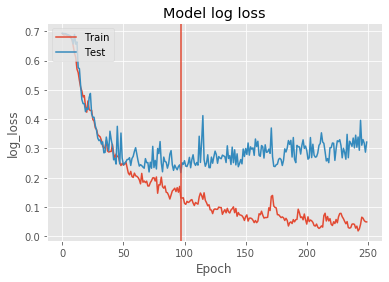

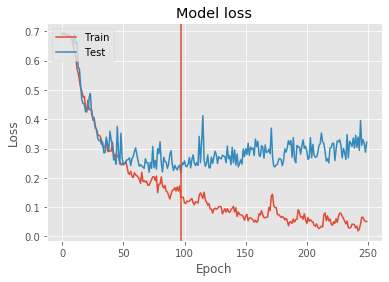

In [16]:
best_epoch = history.history['val_log_loss'].index(np.min((history.history['val_log_loss'])))
"Plot training & validation accuracy values"
plt.plot(history.history['log_loss'])
plt.plot(history.history['val_log_loss'])
plt.axvline(x=best_epoch)
plt.title('Model log loss')
plt.ylabel('log_loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

"Plot training & validation loss values"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axvline(x=best_epoch)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [26]:
model.load_weights('./models/simple_conv_net.h5')
res_loss, res_log_loss = model.evaluate(val_dataset)
print(f"Loss     : {res_loss:0.5f}\nLog loss : {res_log_loss:0.5f}")

1/1 [==============================] - 0s 47ms/step - loss: 0.2174 - log_loss: 0.2174
Loss     : 0.21736
Log loss : 0.21736


### Generate submission file

In [33]:
path_test = "C:/Users/win10/Workspace/kaggle.dataset/statoil-iceberg-classifier-challenge/test.json"
test = pd.read_json(path_test)
test['inc_angle'] = pd.to_numeric(test['inc_angle'],errors='coerce')

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874


In [45]:
"Raw data to numpy"
band_1 = test['band_1'].apply(lambda x: np.reshape(x, newshape=(75,75)))
band_2 = test['band_2'].apply(lambda x: np.reshape(x, newshape=(75,75)))

test_X = np.array([
    np.transpose(np.array([b1,b2]),[1,2,0]) 
    for b1, b2 in zip(band_1, band_2)], dtype=np.float32)

"Data Normalizing"
"(-49.0835, 37.090523)"
nmax, nmin = 40 , -50
test_X = (test_X - nmin)/ (nmax- nmin)

"Build Dataset"
dataset = tf.data.Dataset.from_tensor_slices(test_X).batch(batch_size)

In [46]:
"Model inferencing & save results "
pred_y = model.predict(dataset)
test['is_iceberg'] = pred_y
test[['id','is_iceberg']].to_csv('./submissions/simple_conv_net.csv', index=False)